In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as MPG
import random
import os
import zipfile

In [ ]:
data = zipfile.ZipFile('/content/drive/MyDrive/DATA/Resume Classifier  2.zip')
data.extractall()
data.close()

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/Resume Classifier /train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/Resume Classifier /test", target_size=(224,224))

Found 105 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="softmax"))

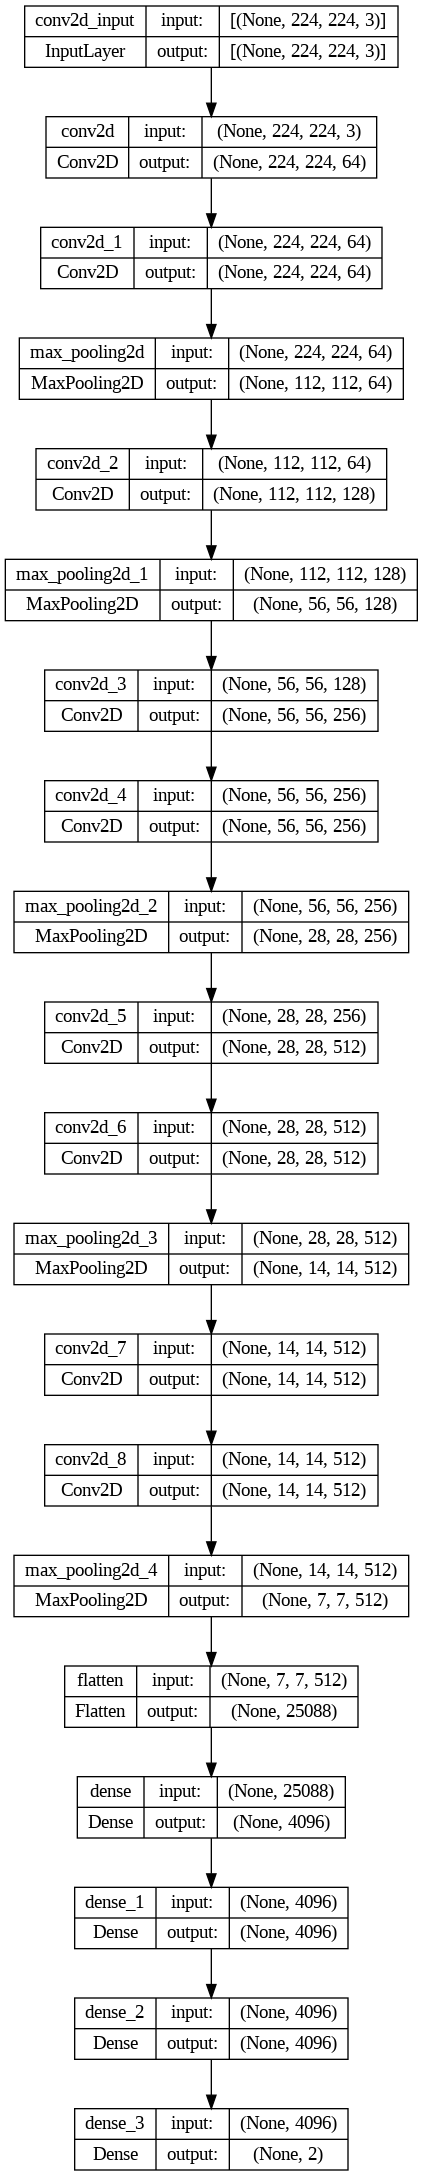

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
model.fit(steps_per_epoch=1,x= traindata, validation_data= testdata,validation_steps=10,epochs=50,batch_size=16)

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.6562

1/1 [==============================] - 5s 5s/step - loss: 0.6808 - accuracy: 0.6562 - val_loss: 0.7092 - val_accuracy: 0.5758
Epoch 2/50
1/1 [==============================] - 1s 872ms/step - loss: 0.6679 - accuracy: 0.6250
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.7315 - accuracy: 0.5312
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.7066 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 366ms/step - loss: 0.7026 - accuracy: 0.4444
Epoch 6/50
1/1 [==============================] - 0s 322ms/step - loss: 0.6818 - accuracy: 0.7778
Epoch 7/50
1/1 [==============================] - 1s 866ms/step - loss: 0.6471 - accuracy: 0.6562
Epoch 8/50
1/1 [==============================] - 1s 852ms/step - loss: 0.6649 - accuracy: 0.5625
Epoch 9/50
1/1 [==============================] - 1s 870ms/step - loss: 0.6304 - accuracy: 0.6250
Epoch 10/50
1/1 [==============================] - 0s 385ms/step - loss: 0.4846 - accuracy: 0.77

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as MPG
import random
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPool2D,Conv2D,Dense,Dropout,InputLayer,Flatten,Rescaling

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                 

In [ ]:
x = mobile.layers[-5].output

In [ ]:
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)
output = Dense(units=10, activation='softmax')(x)

In [ ]:
mobile.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=traindata,
            steps_per_epoch=len(traindata),
            validation_data=testdata,
            validation_steps=len(testdata),
            epochs=10,
            batch_size= 16
)

Epoch 1/10
4/4 [==============================] - 3s 607ms/step - loss: 0.7473 - accuracy: 0.5714 - val_loss: 0.6756 - val_accuracy: 0.5758
Epoch 2/10
4/4 [==============================] - 3s 821ms/step - loss: 0.6449 - accuracy: 0.5714 - val_loss: 0.4789 - val_accuracy: 0.5758
Epoch 3/10
4/4 [==============================] - 3s 831ms/step - loss: 1.1497 - accuracy: 0.5524 - val_loss: 0.6829 - val_accuracy: 0.5455
Epoch 4/10
4/4 [==============================] - 4s 887ms/step - loss: 0.6824 - accuracy: 0.5810 - val_loss: 0.8557 - val_accuracy: 0.5758
Epoch 5/10
4/4 [==============================] - 3s 754ms/step - loss: 0.7636 - accuracy: 0.5524 - val_loss: 0.7960 - val_accuracy: 0.5758
Epoch 6/10
4/4 [==============================] - 3s 778ms/step - loss: 0.8148 - accuracy: 0.5333 - val_loss: 0.7190 - val_accuracy: 0.4242
Epoch 7/10
4/4 [==============================] - 3s 872ms/step - loss: 0.7034 - accuracy: 0.4857 - val_loss: 0.6906 - val_accuracy: 0.5758
Epoch 8/10
4/4 [====